In [1]:
import digits_model
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
import keras.utils
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
from keras import backend
import cv2 as cv
%matplotlib inline

(89, 415, 3)
(356, 2075, 3)


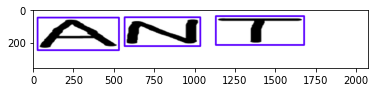

In [10]:
image = cv.imread('ant.png')
height, width, depth = image.shape
print(image.shape)

image = cv.resize(image, dsize=(width*5, height*4), interpolation=cv.INTER_CUBIC)
print(image.shape)

gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)

gsblur=cv.GaussianBlur(img_dilation,(5,5),0)

ctrs, hier = cv.findContours(gsblur.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv.boundingRect(ctr)
    cv.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
plt.imshow(dp)

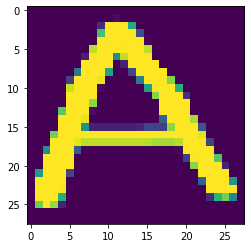

1


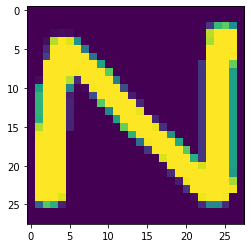

14


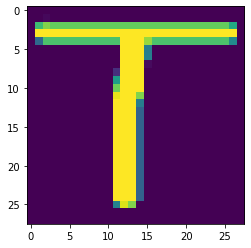

20
Predicted String:ant


In [11]:
model = tf.keras.models.load_model('digits_model')
characters = '0abcdefghijklmnopqrstuvwxyz'
prediction = list()
predicted_word = ''

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv.resize(roi, dsize=(28,28), interpolation=cv.INTER_CUBIC)
    roi = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
    roi = cv.bitwise_not(roi)
    plt.imshow(roi)
    plt.show()
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t.reshape(1,784)
    m.append(roi)
    pred = model.predict(t)
    pred = np.argmax(pred)
    print(pred)
    prediction.append(pred)
    predicted_word += characters[pred]

print(f'Predicted String:{predicted_word}')